In [87]:
import numpy as np

trainA_file = "classification_data/classificationA.train"
testA_file = "classification_data/classificationA.test"
trainB_file = "classification_data/classificationB.train"
testB_file = "classification_data/classificationB.test"
trainC_file = "classification_data/classificationC.train"
testC_file = "classification_data/classificationC.test"

# Fix random seed for reproducibility
np.random.seed(0)

def parseFile(file_name):
    with open(file_name) as f:
        content = [line.strip().split() for line in f.readlines()]
    content_array = np.array(content, np.float)
    
    X = content_array[:, :2]
    y = content_array[:, 2]
    
    # Shuffle datasets
    indices = range(X.shape[0])
    np.random.shuffle(indices)
    X, y = X[indices], y[indices]
    
    return X, y

X_trainA, y_trainA = parseFile(trainA_file)
X_testA, y_testA = parseFile(testA_file)

X_trainB, y_trainB = parseFile(trainB_file)
X_testB, y_testB = parseFile(testB_file)

X_trainC, y_trainC = parseFile(trainC_file)
X_testC, y_testC = parseFile(testC_file)

print(X_trainA.shape, y_trainA.shape)
print(X_testA.shape, y_testA.shape)
print(X_trainB.shape, y_trainB.shape)
print(X_testB.shape, y_testB.shape)
print(X_trainC.shape, y_trainC.shape)
print(X_testC.shape, y_testC.shape)

((150, 2), (150,))
((1500, 2), (1500,))
((300, 2), (300,))
((2000, 2), (2000,))
((400, 2), (400,))
((3000, 2), (3000,))


In [88]:
from numpy.linalg import inv
from math import log
from scipy.special import expit

class FisherLDA():
    def __init__(self):
        self.pi = None
        self.mu0 = None
        self.mu1 = None
        self.sigma = None
        
    def fit(self, X, y):
        y = np.reshape(y, (-1, 1))
        n_tot = np.shape(y)[0]
        n_pos = np.sum(y)
        n_neg = n_tot - n_pos
        
        self.pi = n_pos / n_tot
        self.mu1 = np.dot(y.T, X) / n_pos         # row vector
        self.mu0 = np.dot((1.0 - y.T), X) / n_neg # row vector

        diff_mu1 = (X - self.mu1)[y.flatten() == 1]
        diff_mu0 = (X - self.mu0)[y.flatten() == 0]
        self.sigma = (np.dot(diff_mu1.T, diff_mu1) + np.dot(diff_mu0.T, diff_mu0)) / n_tot
        
    def predict(self, X):
        diff = (self.mu1 - self.mu0)      # row vector
        sigma_inv = inv(self.sigma)
        self.beta1 = np.dot(diff, sigma_inv).T # column vector
        self.beta0 = -np.dot(diff, np.dot(sigma_inv, (self.mu1 + self.mu0).T)) / 2 + \
                    log(self.pi / (1.0 - self.pi))
        probas = expit(np.dot(X, self.beta1) + self.beta0)
        
        return (probas > 0.5).flatten()

Gaussians with different means and shared covariance matrix
Training set accuracy = 0.986666666667
Test set accuracy     = 0.98
Positive samples are in red, negative samples in blue


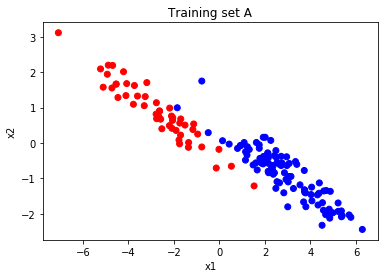

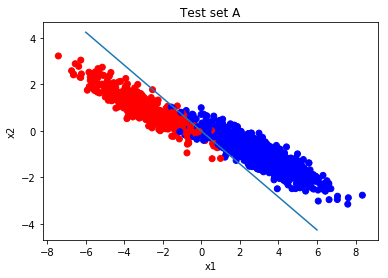

In [89]:
import matplotlib.pyplot as plt

print("Gaussians with different means and shared covariance matrix")

model = FisherLDA()
model.fit(X_trainA, y_trainA)

print("Training set accuracy = {}".format(
    np.mean(model.predict(X_trainA) == y_trainA)))
print("Test set accuracy     = {}".format(
    np.mean(model.predict(X_testA) == y_testA)))

print("Positive samples are in red, negative samples in blue")
color_map = {0: "blue", 1: "red"}

plt.scatter(X_trainA[:, 0], 
            X_trainA[:, 1], 
            c=[color_map[label] for label in y_trainA])
plt.title("Training set A")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

plt.scatter(X_testA[:, 0], 
            X_testA[:, 1], 
            c=[color_map[label] for label in y_testA])

# Plot decision boundary
w0, w1, w2 = model.beta0[0, 0], model.beta1[0, 0], model.beta1[1, 0]
points = np.array([-6, 6])
plt.plot(points, (-w0 - w1 * points) / w2)

plt.title("Test set A")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Gaussians with different means and different covariance matrices
Training set accuracy = 0.97
Test set accuracy     = 0.9585


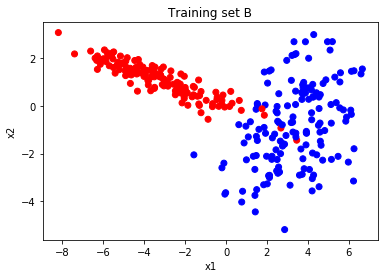

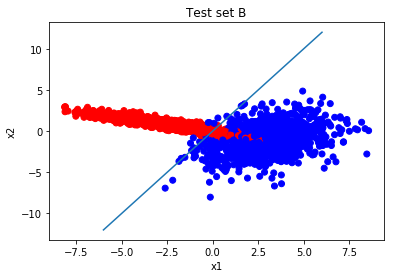

In [90]:
print("Gaussians with different means and different covariance matrices")

model = FisherLDA()
model.fit(X_trainB, y_trainB)

print("Training set accuracy = {}".format(
    np.mean(model.predict(X_trainB) == y_trainB)))
print("Test set accuracy     = {}".format(
    np.mean(model.predict(X_testB) == y_testB)))

plt.scatter(X_trainB[:, 0], 
            X_trainB[:, 1], 
            c=[color_map[label] for label in y_trainB])
plt.title("Training set B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

plt.scatter(X_testB[:, 0], 
            X_testB[:, 1], 
            c=[color_map[label] for label in y_testB])

# Plot decision boundary
w0, w1, w2 = model.beta0[0, 0], model.beta1[0, 0], model.beta1[1, 0]
points = np.array([-6, 6])
plt.plot(points, (-w0 - w1 * points) / w2)

plt.title("Test set B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

One class is a mixture of two Gaussians, the other a single Gaussian
Training set accuracy = 0.945
Test set accuracy     = 0.957666666667


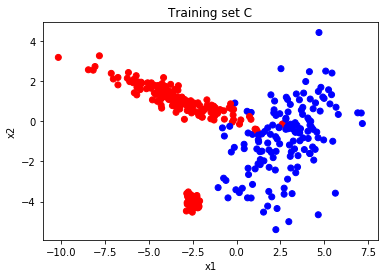

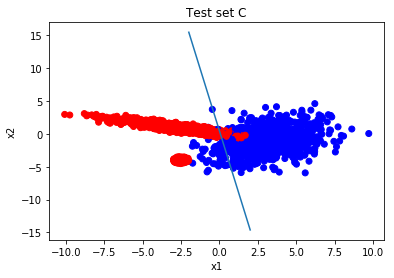

In [91]:
print("One class is a mixture of two Gaussians, the other a single Gaussian")

model = FisherLDA()
model.fit(X_trainC, y_trainC)

print("Training set accuracy = {}".format(
    np.mean(model.predict(X_trainC) == y_trainC)))
print("Test set accuracy     = {}".format(
    np.mean(model.predict(X_testC) == y_testC)))

plt.scatter(X_trainC[:, 0], 
            X_trainC[:, 1], 
            c=[color_map[label] for label in y_trainC])
plt.title("Training set C")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

plt.scatter(X_testC[:, 0], 
            X_testC[:, 1], 
            c=[color_map[label] for label in y_testC])

# Plot decision boundary
w0, w1, w2 = model.beta0[0, 0], model.beta1[0, 0], model.beta1[1, 0]
points = np.array([-2, 2])
plt.plot(points, (-w0 - w1 * points) / w2)

plt.title("Test set C")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [92]:
class LogisticRegression():
    def __init__(self):
        self.w = None
        
    def _newtonUpdate(self, X, y, threshold=1e-1):
        pred = expit(np.dot(X, self.w))
        D = np.diag((pred * (1 - pred)).flatten())
        z = np.dot(X, self.w) + np.dot(inv(D), y - pred)
        self.w = np.dot(inv(np.dot(X.T, np.dot(D, X))), 
                       np.dot(X.T, np.dot(D, z)))
        
        # Stopping criterion : norm of gradient of w squared
        grad = np.dot(X.T, pred - y)
        return np.sum(grad ** 2) > threshold
        
    def fit(self, X, y):
        # Add column of ones for bias
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        y = np.reshape(y, (-1, 1))
        n_dim = X.shape[1]
        
        # Fix random seed for reproducibility, initialize weights randomly
        np.random.seed(0)
        self.w = np.random.uniform(-1, 1, size=(n_dim, 1))
        
        # Update w until norm of gradient of w falls below threshold
        while self._newtonUpdate(X, y):
            pass
    
    def predict(self, X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        probas = expit(np.dot(X, self.w))
        return (probas > 0.5).flatten()

Training set accuracy = 1.0
Test set accuracy     = 0.964666666667
Parameter vector :
 [w0 = -4.76887646848, w1 = -24.889162174, w2 = -42.2362350405]


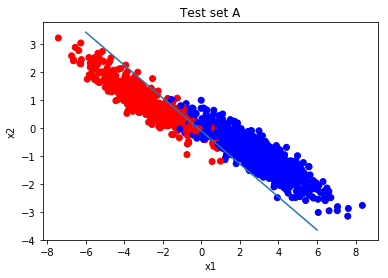

In [93]:
model = LogisticRegression()
model.fit(X_trainA, y_trainA)

print("Training set accuracy = {}".format(
    np.mean(model.predict(X_trainA) == y_trainA)))
print("Test set accuracy     = {}".format(
    np.mean(model.predict(X_testA) == y_testA)))

w0, w1, w2 = model.w[0,0], model.w[1, 0], model.w[2, 0]
print("Parameter vector :\n [w0 = {}, w1 = {}, w2 = {}]".format(w0, w1, w2))

plt.scatter(X_testA[:, 0], 
            X_testA[:, 1], 
            c=[color_map[label] for label in y_testA])

# Plot decision boundary
points = np.array([-6, 6])
plt.plot(points, (-w0 - w1 * points) / w2)

plt.title("Test set A")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Training set accuracy = 0.98
Test set accuracy     = 0.957
Parameter vector :
 [w0 = 1.34958728405, w1 = -1.70518219205, w2 = 1.02378313852]


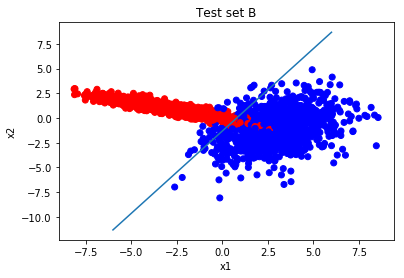

In [94]:
model = LogisticRegression()
model.fit(X_trainB, y_trainB)

print("Training set accuracy = {}".format(
    np.mean(model.predict(X_trainB) == y_trainB)))
print("Test set accuracy     = {}".format(
    np.mean(model.predict(X_testB) == y_testB)))

w0, w1, w2 = model.w[0,0], model.w[1, 0], model.w[2, 0]
print("Parameter vector :\n [w0 = {}, w1 = {}, w2 = {}]".format(w0, w1, w2))

plt.scatter(X_testB[:, 0], 
            X_testB[:, 1], 
            c=[color_map[label] for label in y_testB])

# Plot decision boundary
points = np.array([-6, 6])
plt.plot(points, (-w0 - w1 * points) / w2)

plt.title("Test set B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Training set accuracy = 0.96
Test set accuracy     = 0.977333333333
Parameter vector :
 [w0 = 0.95908819514, w1 = -2.20310067877, w2 = 0.709178666416]


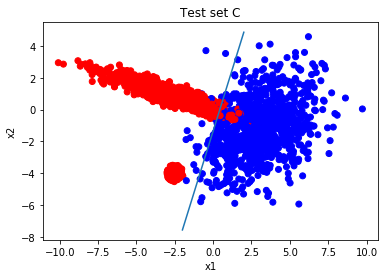

In [95]:
model = LogisticRegression()
model.fit(X_trainC, y_trainC)

print("Training set accuracy = {}".format(
    np.mean(model.predict(X_trainC) == y_trainC)))
print("Test set accuracy     = {}".format(
    np.mean(model.predict(X_testC) == y_testC)))

w0, w1, w2 = model.w[0,0], model.w[1, 0], model.w[2, 0]
print("Parameter vector :\n [w0 = {}, w1 = {}, w2 = {}]".format(w0, w1, w2))

plt.scatter(X_testC[:, 0], 
            X_testC[:, 1], 
            c=[color_map[label] for label in y_testC])

# Plot decision boundary
points = np.array([-2, 2])
plt.plot(points, (-w0 - w1 * points) / w2)

plt.title("Test set C")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [96]:
class LinearRegression():
    def __init__(self):
        self.w = None
        
    def fit(self, X, y):
        # Add column of ones for bias
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        y = np.reshape(y, (-1, 1))
        
        self.w = np.dot(inv(np.dot(X.T, X)), np.dot(X.T, y))
    
    def predict(self, X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        y_hat = np.dot(X, self.w)
        return (y_hat > 0.5).flatten()

Training set accuracy = 0.986666666667
Test set accuracy     = 0.979333333333
Parameter vector :
 [w0 = 0.492292037565, w1 = -0.264007502359, w2 = -0.372593109145]


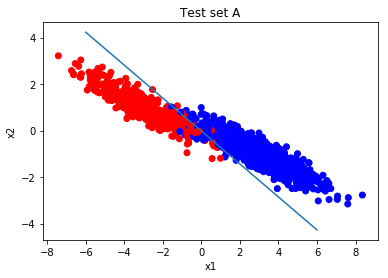

In [97]:
model = LinearRegression()
model.fit(X_trainA, y_trainA)

print("Training set accuracy = {}".format(
    np.mean(model.predict(X_trainA) == y_trainA)))
print("Test set accuracy     = {}".format(
    np.mean(model.predict(X_testA) == y_testA)))

w0, w1, w2 = model.w[0,0], model.w[1, 0], model.w[2, 0]
print("Parameter vector :\n [w0 = {}, w1 = {}, w2 = {}]".format(w0, w1, w2))

plt.scatter(X_testA[:, 0], 
            X_testA[:, 1], 
            c=[color_map[label] for label in y_testA])

# Plot decision boundary
points = np.array([-6, 6])
plt.plot(points, (-w1 * points + 0.5 - w0) / w2)

plt.title("Test set A")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Training set accuracy = 0.97
Test set accuracy     = 0.9585
Parameter vector :
 [w0 = 0.500050427, w1 = -0.104245751042, w2 = 0.0517911796205]


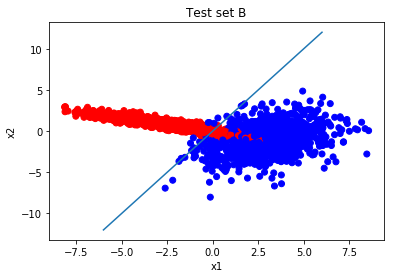

In [98]:
model = LinearRegression()
model.fit(X_trainB, y_trainB)

print("Training set accuracy = {}".format(
    np.mean(model.predict(X_trainB) == y_trainB)))
print("Test set accuracy     = {}".format(
    np.mean(model.predict(X_testB) == y_testB)))

w0, w1, w2 = model.w[0,0], model.w[1, 0], model.w[2, 0]
print("Parameter vector :\n [w0 = {}, w1 = {}, w2 = {}]".format(w0, w1, w2))

plt.scatter(X_testB[:, 0], 
            X_testB[:, 1], 
            c=[color_map[label] for label in y_testB])

# Plot decision boundary
points = np.array([-6, 6])
plt.plot(points, (-w1 * points + 0.5 - w0) / w2)

plt.title("Test set B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Training set accuracy = 0.945
Test set accuracy     = 0.957666666667
Parameter vector :
 [w0 = 0.508399815826, w1 = -0.127693330499, w2 = -0.0170014214318]


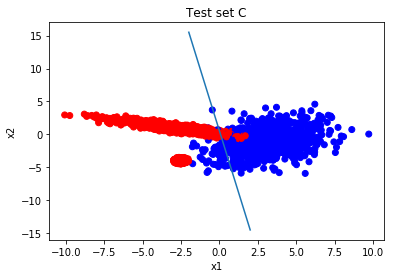

In [99]:
model = LinearRegression()
model.fit(X_trainC, y_trainC)

print("Training set accuracy = {}".format(
    np.mean(model.predict(X_trainC) == y_trainC)))
print("Test set accuracy     = {}".format(
    np.mean(model.predict(X_testC) == y_testC)))

w0, w1, w2 = model.w[0,0], model.w[1, 0], model.w[2, 0]
print("Parameter vector :\n [w0 = {}, w1 = {}, w2 = {}]".format(w0, w1, w2))

plt.scatter(X_testC[:, 0], 
            X_testC[:, 1], 
            c=[color_map[label] for label in y_testC])

# Plot decision boundary
points = np.array([-2, 2])
plt.plot(points, (-w1 * points + 0.5 - w0) / w2)

plt.title("Test set C")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [100]:
from numpy.linalg import det

class QDA():
    def __init__(self):
        self.pi = None
        self.mu0 = None
        self.mu1 = None
        self.sigma0 = None
        self.sigma1 = None
        
    def fit(self, X, y):
        y = np.reshape(y, (-1, 1))
        n_tot = np.shape(y)[0]
        n_pos = np.sum(y)
        n_neg = n_tot - n_pos
        
        self.pi = n_pos / n_tot
        self.mu1 = np.dot(y.T, X) / n_pos         # row vector
        self.mu0 = np.dot((1.0 - y.T), X) / n_neg # row vector

        diff_mu1 = (X - self.mu1)[y.flatten() == 1]
        diff_mu0 = (X - self.mu0)[y.flatten() == 0]
        self.sigma1 = np.dot(diff_mu1.T, diff_mu1) / n_pos
        self.sigma0 = np.dot(diff_mu0.T, diff_mu0) / n_neg
        
    def predict(self, X):
        sigma1_inv, sigma0_inv = inv(self.sigma1), inv(self.sigma0)
        
        self.beta2 = (sigma0_inv - sigma1_inv) / 2
        self.beta1 = np.dot(self.mu1, sigma1_inv) \
                    - np.dot(self.mu0, sigma0_inv) # row vector 
        self.beta0 = (np.dot(self.mu0, np.dot(sigma0_inv, self.mu0.T)) 
                    - np.dot(self.mu1, np.dot(sigma1_inv, self.mu1.T)) \
                    + log(det(self.sigma0)) - log(det(self.sigma1))) / 2 \
                    + log(self.pi / (1 - self.pi))
        
        quadratic_term = np.diag(np.dot(X, np.dot(self.beta2, X.T))).reshape(-1, 1)
        linear_term = np.dot(X, self.beta1.T)
        probas = expit(quadratic_term + linear_term + self.beta0)
        
        return (probas > 0.5).flatten()

Training set accuracy = 0.993333333333
Test set accuracy     = 0.98
Parameters :
 -0.626271453018 (beta0) 
 [ -7.36527314 -10.87335416] (beta1) 
 [[-0.7587202  -1.51361485]
 [-1.51361485 -2.86166338]] (beta2)


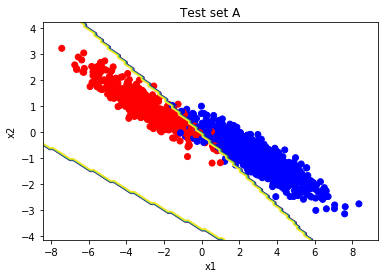

In [101]:
model = QDA()
model.fit(X_trainA, y_trainA)

print("Training set accuracy = {}".format(
    np.mean(model.predict(X_trainA) == y_trainA)))
print("Test set accuracy     = {}".format(
    np.mean(model.predict(X_testA) == y_testA)))

beta0, beta1, beta2 = model.beta0[0, 0], model.beta1[0, :], model.beta2
print("Parameters :\n {} (beta0) \n {} (beta1) \n {} (beta2)".format(
    beta0, beta1, beta2))

plt.scatter(X_testA[:, 0], 
            X_testA[:, 1], 
            c=[color_map[label] for label in y_testA])

# Plot decision boundary
x1_min, x1_max = X_testA[:, 0].min() - 1, X_testA[:, 0].max() + 1
x2_min, x2_max = X_testA[:, 1].min() - 1, X_testA[:, 1].max() + 1
X1, X2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), 
                     np.linspace(x2_min, x2_max, 100))
Z = model.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z)

plt.title("Test set A")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Training set accuracy = 0.986666666667
Test set accuracy     = 0.98
Parameters :
 3.366501856 (beta0) 
 [-2.28065009  1.45700199] (beta1) 
 [[-0.47982628 -1.92382528]
 [-1.92382528 -5.52933507]] (beta2)


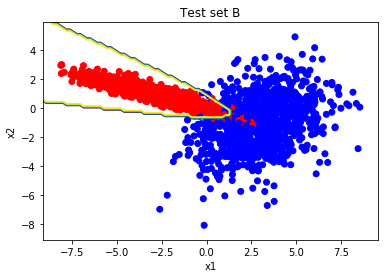

In [102]:
model = QDA()
model.fit(X_trainB, y_trainB)

print("Training set accuracy = {}".format(
    np.mean(model.predict(X_trainB) == y_trainB)))
print("Test set accuracy     = {}".format(
    np.mean(model.predict(X_testB) == y_testB)))

beta0, beta1, beta2 = model.beta0[0, 0], model.beta1[0, :], model.beta2
print("Parameters :\n {} (beta0) \n {} (beta1) \n {} (beta2)".format(
    beta0, beta1, beta2))

plt.scatter(X_testB[:, 0], 
            X_testB[:, 1], 
            c=[color_map[label] for label in y_testB])

# Plot decision boundary
x1_min, x1_max = X_testB[:, 0].min() - 1, X_testB[:, 0].max() + 1
x2_min, x2_max = X_testB[:, 1].min() - 1, X_testB[:, 1].max() + 1
X1, X2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), 
                     np.linspace(x2_min, x2_max, 100))
Z = model.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z)

plt.title("Test set B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Training set accuracy = 0.9475
Test set accuracy     = 0.961666666667
Parameters :
 0.110042748892 (beta0) 
 [-2.66524064  0.34888942] (beta1) 
 [[ 0.00244301 -0.14592984]
 [-0.14592984  0.11805533]] (beta2)


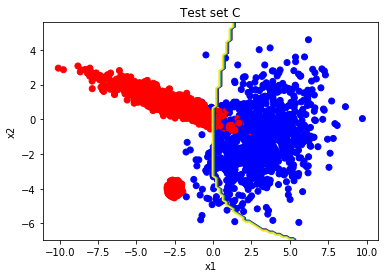

In [103]:
model = QDA()
model.fit(X_trainC, y_trainC)

print("Training set accuracy = {}".format(
    np.mean(model.predict(X_trainC) == y_trainC)))
print("Test set accuracy     = {}".format(
    np.mean(model.predict(X_testC) == y_testC)))

beta0, beta1, beta2 = model.beta0[0, 0], model.beta1[0, :], model.beta2
print("Parameters :\n {} (beta0) \n {} (beta1) \n {} (beta2)".format(
    beta0, beta1, beta2))

plt.scatter(X_testC[:, 0], 
            X_testC[:, 1], 
            c=[color_map[label] for label in y_testC])

# Plot decision boundary
x1_min, x1_max = X_testC[:, 0].min() - 1, X_testC[:, 0].max() + 1
x2_min, x2_max = X_testC[:, 1].min() - 1, X_testC[:, 1].max() + 1
X1, X2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), 
                     np.linspace(x2_min, x2_max, 100))
Z = model.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z)

plt.title("Test set C")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()